# K-Means Clustering

This challenge will help you gain intuition on how a **K-means** clustering works.  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans

## 1) Generate Data

To make sure that our data actually contains relevant clusters, we will generate it ourselves.

To do so, we will use [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) from `sklearn`.  

We want a dataset with **500 observations**, **2 features** and **4 clusters**.  

We use *random_state=42* so that you can compare results with your buddy.

👇 Run the cell below to generate your data

In [2]:
random_state=42

# Generate data
X, y = make_blobs(n_samples=500, centers=4, random_state=random_state)

❓ Make a scatter plot of your two features against each other  
❓ Color the points according to their corresponding  value in `y`

<details span="markdown">
    <summary>💡 Help</summary>

- Recall the color argument:
 - `c` for matplotlib  
 - `hue` for seaborn 

---
</details>

     Feature 1  Feature 2
0    -7.689054   6.620346
1    -9.576514  -6.934404
2     6.829682   1.164871
3    -2.901306   7.550771
4    -5.678413  -7.288185
..         ...        ...
495  -7.438972   8.248157
496  -2.586299   9.355438
497  -7.215412  -5.211088
498  -7.402350  -5.831100
499   5.159225   3.505909

[500 rows x 2 columns]


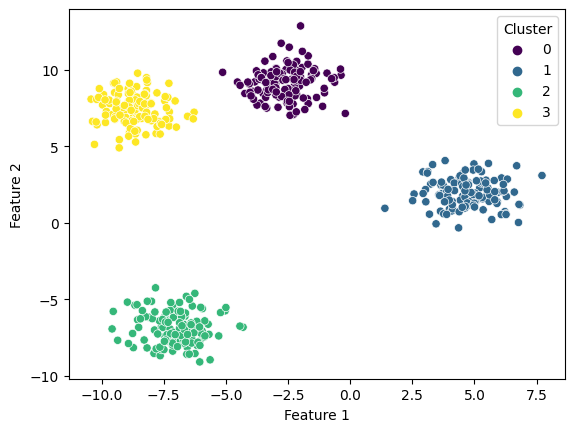

In [14]:
# YOUR CODE HERE
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
print (df)
df['Cluster'] = y

# Scatter plot with Seaborn
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', data=df, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


👆 You should see 4 distinct clusters, each with a different color.  

Training a KNN Classifier on `X` with `y` as target would give great results.

However today is about **Unsupervised Learning**

Let's assume that we never knew about `y` and only received `X` to work with.  

We only have 2 features and no target 😱  

**What can we can achieve with only `X` ?**  🤔

## 2) Apply K-Means

Your goal is to find the **number of clusters** that best matches the structure of your data.  


👉Import `KMeans` from `sklearn` and initiate a model with the parameters:
- `n_clusters=2`,
- `random_state=42`

❓Fit the model on your `X`  
❓ Get your predictions and store them in a `y_pred` variable.  

In [9]:
# YOUR CODE HERE
#### Initialize KMeans  #####
kmeans = KMeans(n_clusters=2, random_state=42)

#### Fit the model on your data X #####
kmeans.fit(X)

#### Get predictions #####
y_pred = kmeans.predict(X)

👆 The predictions are a vector of cluster assignment for each observation.  
With `n_clusters=2` each observation in `X` will be associated to either one of two clusters.

❓ Make a scatter plot of your two features against each other  
❓ Color the points according the predicted cluster in `y_pred`

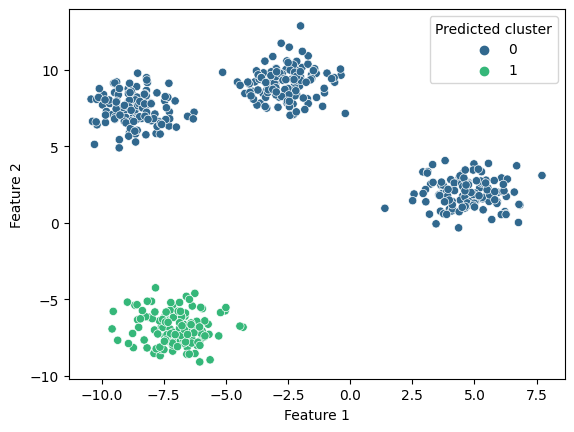

In [13]:
# YOUR CODE HERE

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Predicted cluster'] = y_pred

sns.scatterplot(x='Feature 1', y='Feature 2', hue='Predicted cluster', data=df, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


👆 You can still see 4 distinct clusters, however the color only show 2. 😱

That's exactly what we asked for when giving `n_clusters=2` to our **Kmeans**.

We asked our algorithm to assign each observation to one of two centroids, hence one of two clusters only.

**This clustering around 2 centers is clearly no optimal, we can do better** 💪

### 🧪 Test your code

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('two_means', clusters=y_pred)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/06-Unsupervised-Learning/data-image-compression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_two_means.py::TestTwoMeans::test_imbalanced_clusters PASSED         [ 50%]
test_two_means.py::TestTwoMeans::test_two_clusters PASSED                [100%]

============================== 2 passed in 0.54s ===============================


💯 You can commit your code:

git add tests/two_means.pickle

git commit -m 'Completed two_means step'

git push origin master



In [17]:
! git add tests/two_means.pickle

! git commit -m 'Completed two_means step'

! git push origin master

[master 04c20e2] Completed two_means step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/two_means.pickle
Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 4 threads
Compressing objects: 100% (14/14), done.
Writing objects: 100% (15/15), 9.12 KiB | 1.52 MiB/s, done.
Total 15 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), done.
To github.com:juliensoudet/data-image-compression.git
 * [new branch]      master -> master


## 3) Find the optimal number of clusters  
*The Elbow Method*

Once fitted, the `KMeans` instance gains an attribute named `inertia_`.

It represents the **sum of squared distances of observations to their associated (closest) cluster center**. 

So the lower, the better.  

In [16]:
KMeans(n_clusters=2, random_state=random_state).fit(X).inertia_

15737.083577865

👆 Think of this in comparison to the Sum of Squared Errors in a Linear Regression 👇  

- `SSE` of a `Linear Regression` 👉 `Sum of squared distances between observations and the regression line`  

- `Inertia` of a `KMeans Clustering` 👉 `Sum of squared distances between observations and their closest centroid`

One way for us to find the optimal number of clusters is a heuristic: the **Elbow Method**.  

We have to try several number of clusters and look at the inertia obtained for each one.  

Let's do it to get the intuition! ⚙️🧠

❓ Fit a `KMeans` for every number of clusters between 1 and 10, for each one, save the inertia in a list `wcss`

In [34]:
# Apply the elbow method to find the optimal number of clusters.
wcss = []
clusters = list(range(1, 11))
for c in clusters : 
    kmeans = KMeans(n_clusters=c, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

optimal_number_of_clusters = wcss.index(min(wcss)) + 1 

print ("The optimal number of clusters is :", optimal_number_of_clusters )

[33903.90415102105, 15737.083577865, 3426.2572380059655, 948.8903433376544, 861.7648347702068, 773.6573344355761, 686.8539391883381, 639.0149444275355, 599.3092151884364, 512.2923697664925]
The optimal number of clusters is : 10


❓  Plot the inertias in `wcss` against their corresponding number of clusters ❓

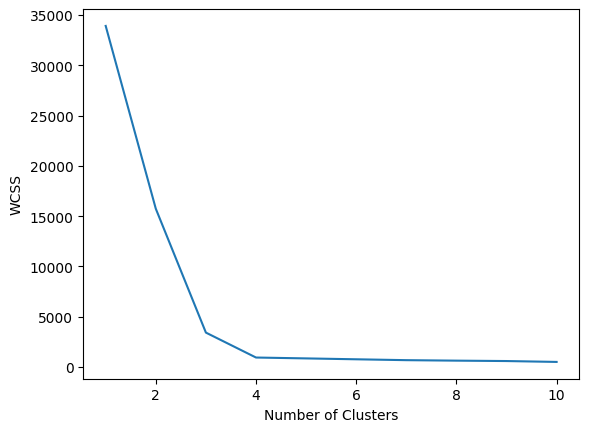

In [36]:
# YOUR CODE HERE
df_wcss = pd.DataFrame({'Number of clusters': clusters, 'WCSS': wcss})

# Plot WCSS against number of clusters
sns.lineplot(x='Number of clusters', y='WCSS', data=df_wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

👆 We clearly see an Elbow at 4 clusters.  

## 3) K-Means with optimal clusters

With the optimal number of clusters know, it's time to fit a last `KMeans`.

❓ Fit a `KMeans` with `n_clusters=4` on your `X`, store the predictions in `y_pred`  

❓ Make a scatter plot of your two features against each other, and color the points  according the predicted cluster in `y_pred`

In [39]:
# YOUR CODE HERE
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X)
y_pred = kmeans_4.predict(X)
y_pred


array([1, 2, 0, 3, 2, 2, 1, 2, 0, 2, 0, 3, 0, 3, 2, 0, 3, 1, 1, 3, 0, 3,
       0, 1, 1, 2, 2, 1, 1, 3, 2, 3, 3, 3, 2, 2, 0, 0, 1, 1, 2, 0, 3, 3,
       3, 0, 0, 0, 2, 1, 2, 3, 1, 2, 0, 3, 3, 1, 2, 1, 1, 3, 2, 1, 0, 2,
       2, 1, 0, 2, 0, 2, 2, 1, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 1, 1, 1, 1,
       0, 3, 1, 2, 0, 2, 0, 1, 3, 0, 3, 1, 0, 0, 0, 1, 1, 3, 3, 1, 3, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 3, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0,
       3, 1, 3, 1, 2, 2, 1, 1, 0, 0, 2, 3, 0, 2, 1, 1, 2, 3, 3, 1, 1, 3,
       3, 2, 2, 2, 3, 1, 3, 3, 1, 1, 3, 0, 3, 2, 2, 1, 1, 2, 3, 2, 3, 3,
       1, 2, 3, 3, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 3, 3, 2, 3, 1, 3, 0,
       0, 3, 1, 3, 0, 3, 3, 2, 2, 0, 2, 0, 3, 2, 1, 2, 3, 2, 0, 0, 0, 2,
       3, 0, 1, 1, 0, 3, 3, 2, 3, 3, 3, 3, 0, 0, 1, 3, 2, 0, 3, 3, 1, 3,
       2, 2, 0, 3, 0, 2, 3, 3, 0, 1, 3, 3, 3, 0, 1, 2, 3, 0, 0, 3, 2, 3,
       0, 1, 0, 2, 2, 3, 3, 0, 1, 0, 1, 0, 2, 0, 2,

That is clustering at its best 	🏆  
We successfully identified **4 clusters** among our observations.  

**Notes:** Scaling features before clustering is not always necessary, but it rarely hurts 😇  
You can check these [detailed answers](https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering) to go further.

🏁 **Don't forget to push your notebook.**  

Proceed the challenges of the day and come back here if you have time 😉

In [40]:
! git add tests/two_means.pickle

! git commit -m 'Completed K_means optimal'

! git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   warmup_k_means.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## 4 - Optional) Hierarchical Clustering

An other method that will help us find the optimal number of clusters is called [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

👉 Plot the **dendrogram** of the hierarchical clustering.

You will need the help of two scipy classes found in its [cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) module:
- [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)
- [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

The linkage actually does the hierarchical clustering with a bottom-up approach: each observation starts in its own cluster.  

At each iteration the algorithm will choose clusters to merge, the last iteration occurs when a single cluster is formed.  

Here we will use Ward's method, which minimizes the total within-cluster variance.  
So at each iteration the algorithm will find the pair of clusters which merging will minimize the within-cluster variance. 

A dendrogram is just a diagram representing a tree-like structure, it allows us to visualize the linkage.  

<br>
<details span="markdown">
    <summary>💡 Solution</summary>

```python
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(Z, color_threshold=50)
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.xticks([]);
```
---
</details>


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
pass  # YOUR CODE HERE

We can still see 4 distinct clusters  

🤔 Why did we used the *Ward method* here?

💡 Because it is the same objective function than K-means, which tries to minimize the inertia (i.e. the within cluster variance)

### Insights on Hierarchical Clustering

👉 Watch this video to better understand hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

👉 Hierarchical clustering is considered *greedy*, meaning that it is likely to yield a local optima and miss the big picture

👉 Note that there exist other clustering linkages (ie. other ways to measure distance between two clusters) <img src=https://editor.analyticsvidhya.com/uploads/40351linkages.PNG>